In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
bank=pd.read_csv('bank-full.csv')

In [3]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [5]:
bank.shape

(45211, 17)

In [6]:
bank.axes

[RangeIndex(start=0, stop=45211, step=1),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object')]

In [7]:
bank.drop(['poutcome'], axis=1, inplace=True)

In [8]:
# view summary of dataset
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [9]:
bank.memory_usage()

Index           128
age          361688
job          361688
marital      361688
education    361688
default      361688
balance      361688
housing      361688
loan         361688
contact      361688
day          361688
month        361688
duration     361688
campaign     361688
pdays        361688
previous     361688
y            361688
dtype: int64

# Explore categorical variable

In [10]:
#finding categorical variables
categorical=[var for var in bank.columns if bank[var].dtype=='O']
print(f'There are {len(categorical)} categorical variables\n')
print('The categorical variables are:',categorical)

There are 9 categorical variables

The categorical variables are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [11]:
bank[categorical].head()

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no


In [12]:
# ckeck for missing values in categorical variables
bank[categorical].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
y            0
dtype: int64

In [13]:
# print categorical variables containg missing values
cat=[var for var in categorical if bank[var].isnull().sum()!=0]
print(bank[cat].isnull().sum())

Series([], dtype: float64)


In [14]:
# view value count of categorical variables
for var in categorical:
    print(f'Variable contains: {var}\n')
    print(bank[var].value_counts())
    print("")

Variable contains: job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Variable contains: marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Variable contains: education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Variable contains: default

no     44396
yes      815
Name: default, dtype: int64

Variable contains: housing

yes    25130
no     20081
Name: housing, dtype: int64

Variable contains: loan

no     37967
yes     7244
Name: loan, dtype: int64

Variable contains: contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Variable contains: month

may    13766
jul     6895
aug     6247
jun     5341
nov 

In [15]:
# print number of labels in Job variable

print('Job contains', len(bank['job'].unique()), 'labels')

Job contains 12 labels


In [16]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [17]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
pd.get_dummies(bank['job'], drop_first=True).head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [19]:
print('marital contains', len(bank['marital'].unique()), 'labels')

marital contains 3 labels


In [20]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

(array([27214.,     0.,     0.,     0.,     0., 12790.,     0.,     0.,
            0.,  5207.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

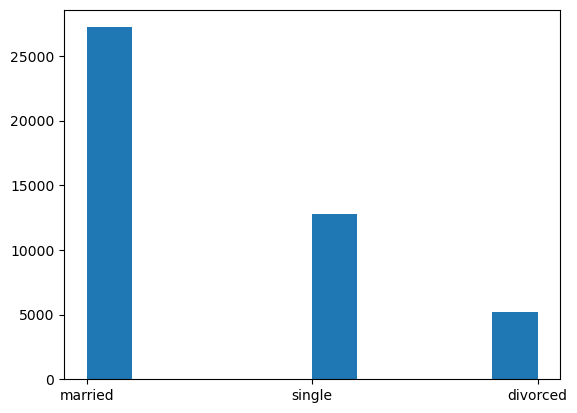

In [22]:
plt.hist(bank['marital'])

In [23]:
pd.get_dummies(bank['marital'], drop_first=True).head()

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [24]:
print('Education contains', len(bank['education'].unique()), 'labels')

Education contains 4 labels


In [25]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [26]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

(array([13301.,     0.,     0., 23202.,     0.,     0.,  1857.,     0.,
            0.,  6851.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

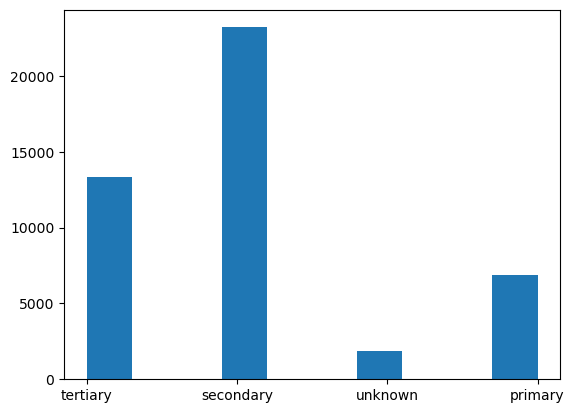

In [27]:
plt.hist(bank['education'])

In [28]:
pd.get_dummies(bank['education'], drop_first=True).head()

,secondary,tertiary,unknown
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [29]:
print('Contact contains', len(bank['contact'].unique()), 'labels')

Contact contains 3 labels


In [30]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [31]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

(array([13020.,     0.,     0.,     0.,     0., 29285.,     0.,     0.,
            0.,  2906.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

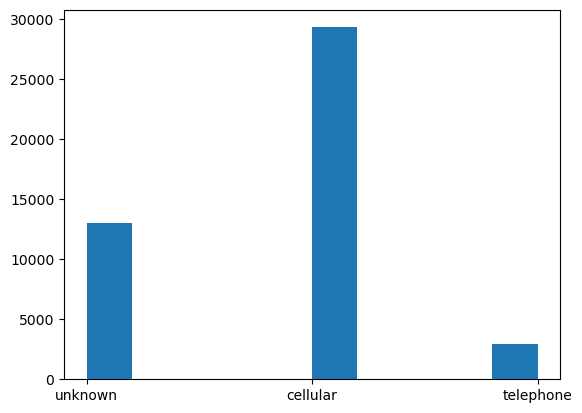

In [32]:
plt.hist(bank['contact'])

In [33]:
pd.get_dummies(bank['contact'], drop_first=True).head()

,telephone,unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
print('month contains', len(bank['month'].unique()), 'labels')

month contains 12 labels


In [35]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [36]:
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [37]:
pd.get_dummies(bank['month'], drop_first=True).head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [38]:
# ckeck for cardinality in categorical variales

for var in categorical:
    print(f'{var} contains {len(bank[var].unique())} labels')

job contains 12 labels
marital contains 3 labels
education contains 4 labels
default contains 2 labels
housing contains 2 labels
loan contains 2 labels
contact contains 3 labels
month contains 12 labels
y contains 2 labels


In [39]:
pd.get_dummies(bank['loan'], drop_first=True).head()


,yes
0,0
1,0
2,1
3,0
4,0


In [40]:
pd.get_dummies(bank['y'], drop_first=True).head()


,yes
0,0
1,0
2,0
3,0
4,0


In [41]:
pd.get_dummies(bank['housing'], drop_first=True).head()


,yes
0,1
1,1
2,1
3,1
4,0


In [42]:
pd.get_dummies(bank['default'], drop_first=True).head()

,yes
0,0
1,0
2,0
3,0
4,0


# Explore Numerical variables

In [43]:
numerical=[var for var in bank.columns if bank[var].dtype!='O']
print(f'there are {len(numerical)} numerical variables')
print(f'The numerical variables are: {numerical}')

there are 7 numerical variables
The numerical variables are: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [44]:
bank[numerical].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [45]:
bank[numerical].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [46]:
numerical.remove('pdays')

In [47]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

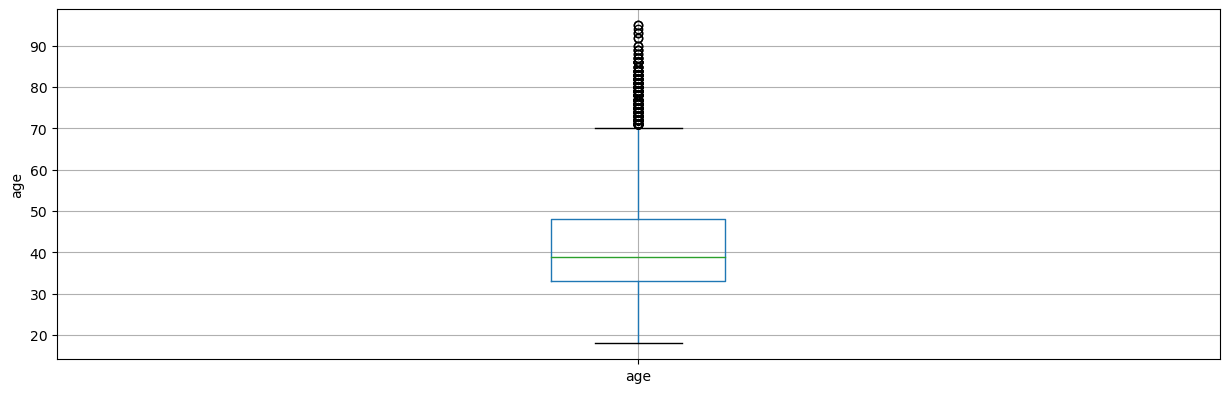

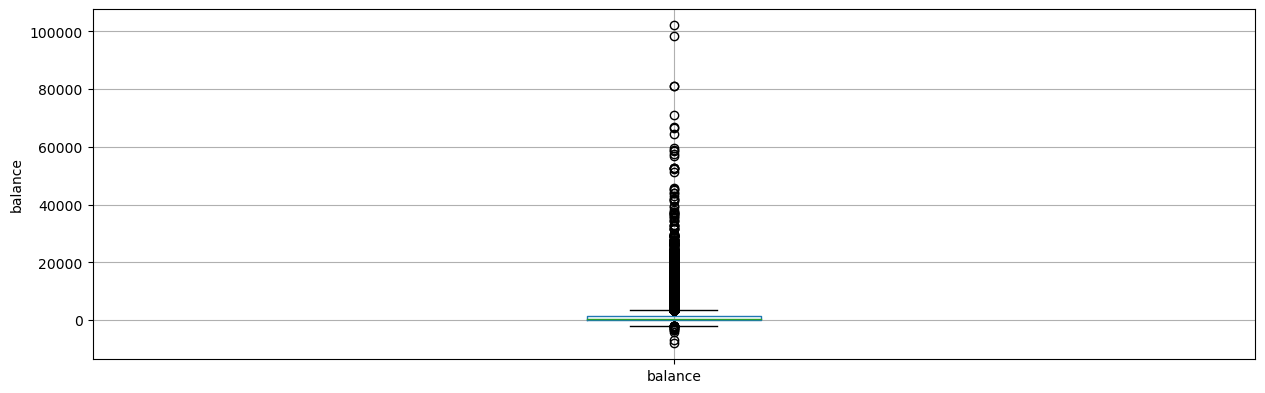

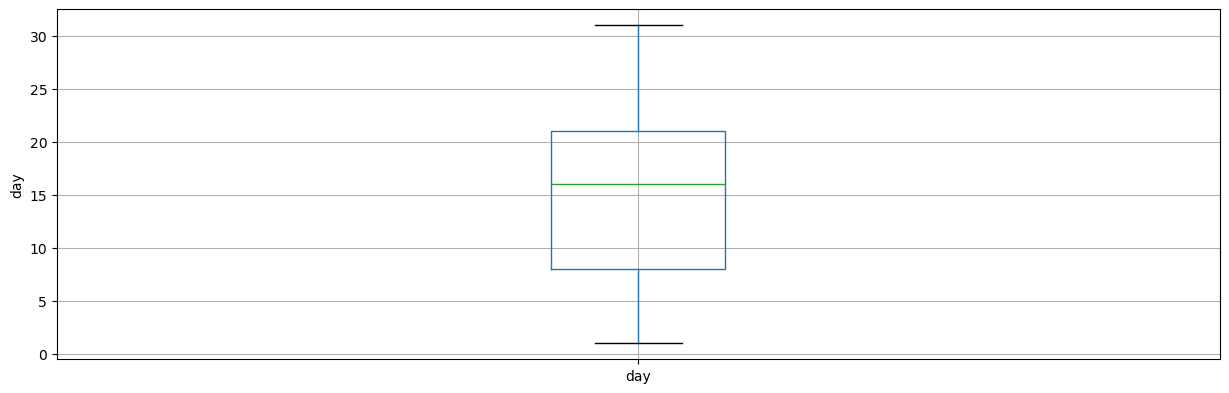

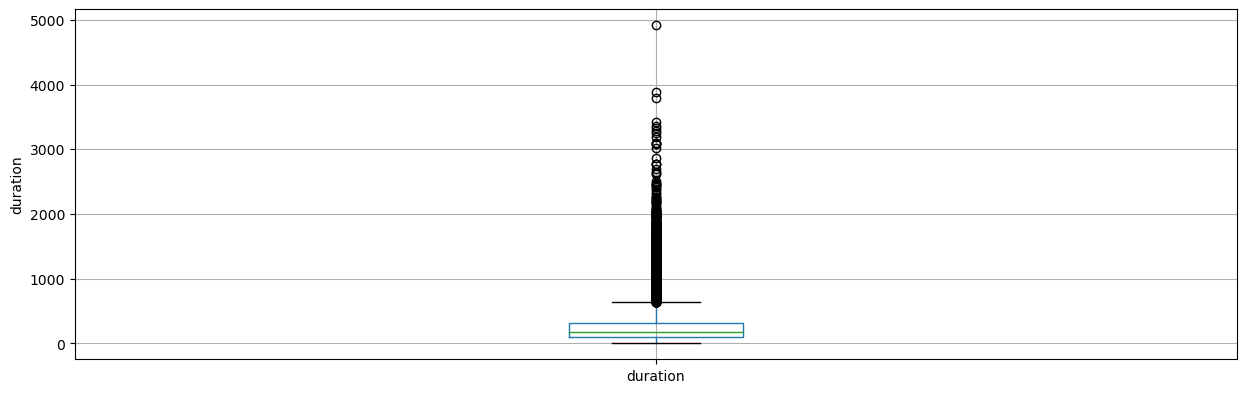

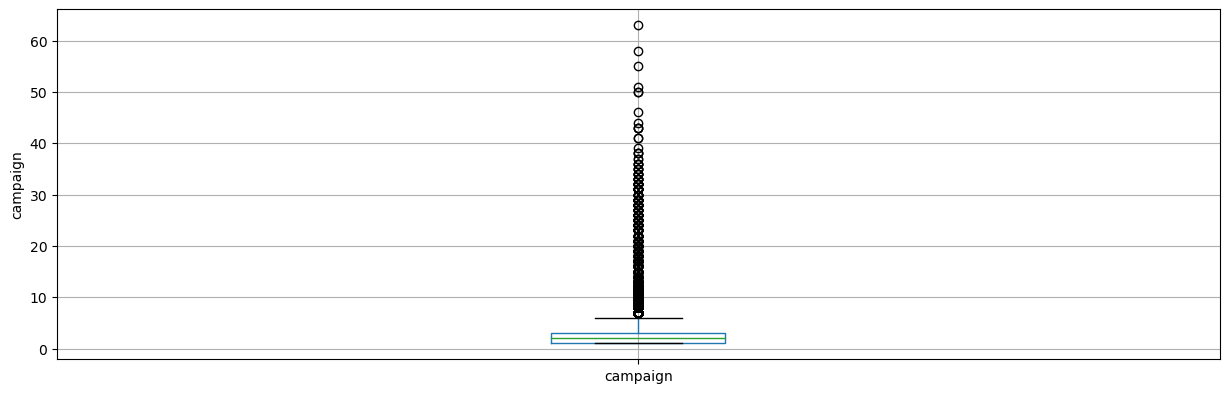

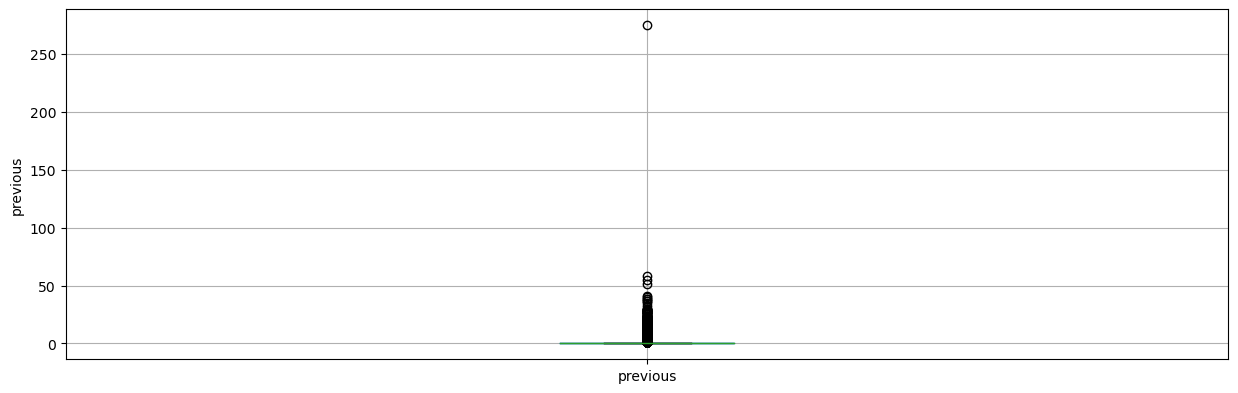

In [48]:
# draw boxplots to visualize outliers
i=0
for var in bank[numerical]:
    plt.figure(figsize=(15,10))

    plt.subplot(2, i+1, i+1)
    fig = bank.boxplot(column=var)
    fig.set_ylabel(var)

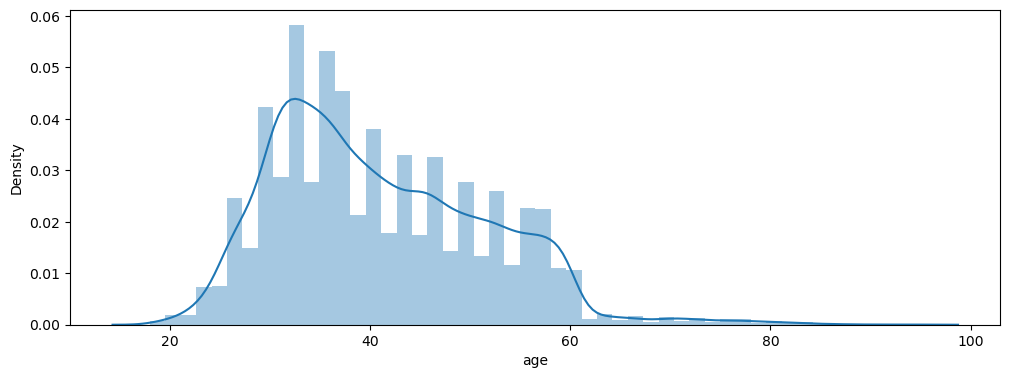

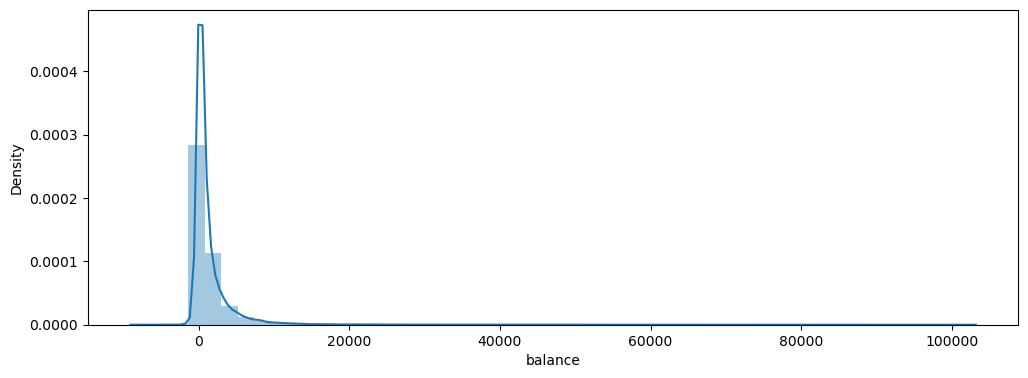

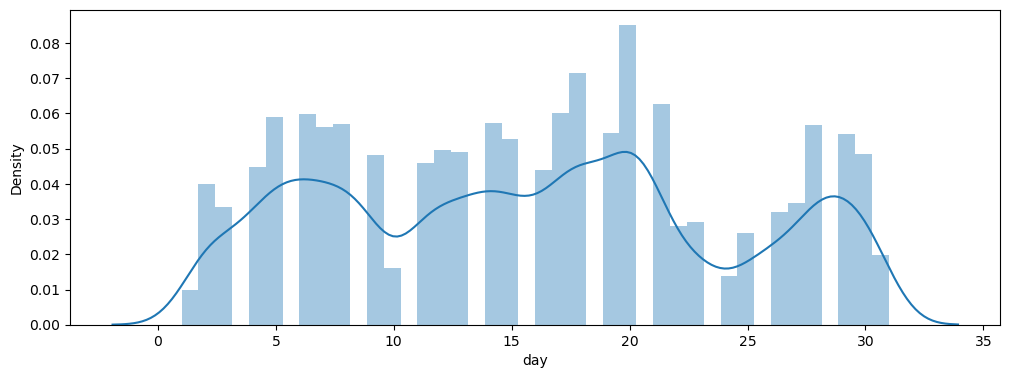

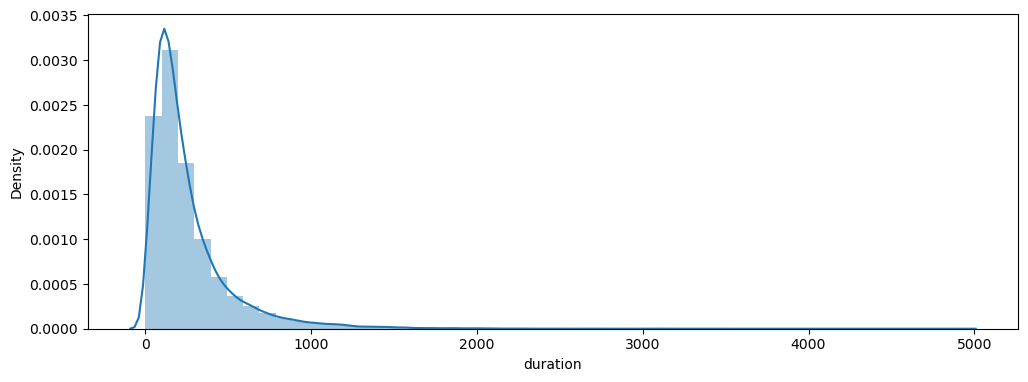

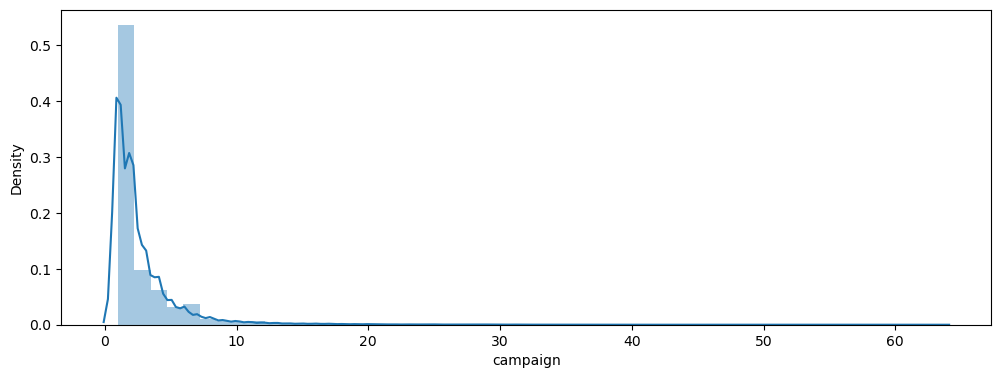

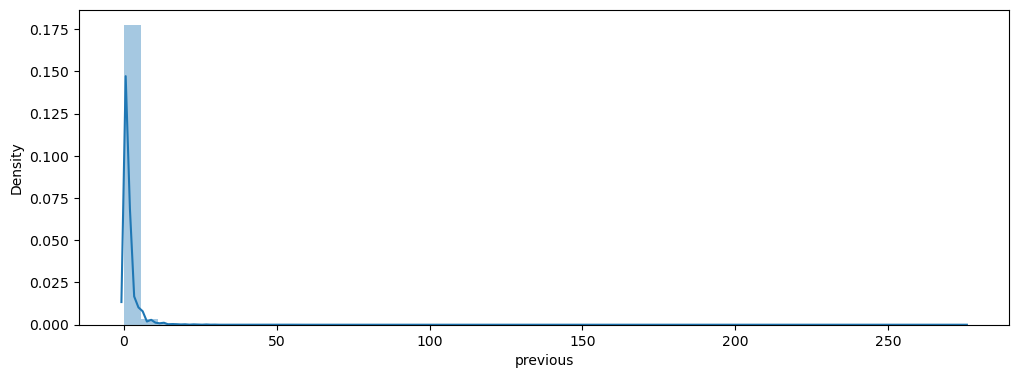

In [49]:
for var in bank[numerical]:
    plt.figure(figsize=(12,9))
    plt.subplot(2,1,1)
    fig=sns.distplot(bank[var])

In [50]:
bank[numerical].describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [51]:
bank[numerical].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [52]:
bank[numerical].kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
previous    4506.860660
dtype: float64

# Statistical Analysis

In [53]:
# Statistical analysis
for var in bank[numerical]:
    print(f'{var} in bank data\n')
    print(bank[var].describe())
    print("")

age in bank data

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

balance in bank data

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

day in bank data

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

duration in bank data

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

campaign in bank data

count    45211.000000
mean         2.763841
std          3.098021
m

# Outliers detection

In [54]:
# finding outliers in balance variable
# IQR=Q3-Q1
# lower=Q1-(3*IQR)
# upper=Q3+(3*IQR)

for var in numerical: 
    IQR=bank[var].quantile(0.75)-bank[var].quantile(0.25)
    lower=bank[var].quantile(0.25)-(3*IQR)
    upper=bank[var].quantile(0.75)+(3*IQR)
    print(f'{var} outliers values are: less then {lower} and greater then {upper}')

age outliers values are: less then -12.0 and greater then 93.0
balance outliers values are: less then -3996.0 and greater then 5496.0
day outliers values are: less then -31.0 and greater then 60.0
duration outliers values are: less then -545.0 and greater then 967.0
campaign outliers values are: less then -5.0 and greater then 9.0
previous outliers values are: less then 0.0 and greater then 0.0


In [55]:
X=bank.drop(['y'],axis=1)
y=bank['y']

In [56]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0


In [57]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [58]:
# split X and y into training and testing set

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
X_train.shape,X_test.shape

((33908, 15), (11303, 15))

# Feature Engineering

In [60]:
X_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
dtype: object

In [61]:
X_test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
dtype: object

In [62]:
# display categorical variables
categorical=[col for col in X_train.columns if X_train[col].dtypes=="O"]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [63]:
#display numerical variables
numerical=[col for col in X_train.columns if X_train[col].dtypes!="O"]
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [64]:
#check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [65]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [66]:
X_train[numerical].describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.925239,1356.416362,15.815766,257.130382,2.767312,40.198626,0.580129
std,10.623153,3008.845715,8.325713,257.813209,3.127014,100.402971,2.389600
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [67]:
X_train = pd.concat([X_train[numerical],
                     pd.get_dummies(X_train.job, drop_first=True),
                     pd.get_dummies(X_train.marital, drop_first=True),
                     pd.get_dummies(X_train.education, drop_first=True),
                     pd.get_dummies(X_train.default, drop_first=True),
                     pd.get_dummies(X_train.loan, drop_first=True),
                     pd.get_dummies(X_train.housing, drop_first=True),
                     pd.get_dummies(X_train.contact, drop_first=True),
                     pd.get_dummies(X_train.month, drop_first=True)],
                    axis=1)

In [68]:
X_train.shape

(33908, 39)

In [69]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
41626,52,118,25,105,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31347,28,459,16,83,13,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22563,36,156,22,122,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37243,55,323,13,200,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32259,38,904,16,361,1,339,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [71]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.job, drop_first=True),
                     pd.get_dummies(X_test.marital, drop_first=True),
                     pd.get_dummies(X_test.education, drop_first=True),
                     pd.get_dummies(X_test.default, drop_first=True),
                     pd.get_dummies(X_test.loan, drop_first=True),
                     pd.get_dummies(X_test.housing, drop_first=True),
                     pd.get_dummies(X_test.contact, drop_first=True),
                     pd.get_dummies(X_test.month, drop_first=True)],axis=1)

In [72]:
X_test.shape

(11303, 39)

In [73]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
3776,40,580,16,192,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9928,47,3644,9,83,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33409,25,538,20,226,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,42,1773,9,311,1,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15738,56,217,21,121,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Feature Scaling

In [74]:
cols=X_train.columns

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [76]:
X_train=pd.DataFrame(X_train,columns=[cols])

In [77]:
X_test=pd.DataFrame(X_test,columns=[cols])

In [78]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.285714,0.078069,0.500000,0.039040,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.376623,0.105887,0.266667,0.016877,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.090909,0.077688,0.633333,0.045954,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.311688,0.088900,0.266667,0.063237,0.000000,0.386468,0.003636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493506,0.074773,0.666667,0.024603,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
y_train.head()

41626    no
31347    no
22563    no
37243    no
32259    no
Name: y, dtype: object

# Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(C=10,solver='liblinear',random_state=1)

In [81]:
logit.fit(X_train,y_train)

LogisticRegression(C=10, random_state=1, solver='liblinear')

In [82]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.285714,0.078069,0.500000,0.039040,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.376623,0.105887,0.266667,0.016877,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.090909,0.077688,0.633333,0.045954,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.311688,0.088900,0.266667,0.063237,0.000000,0.386468,0.003636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.493506,0.074773,0.666667,0.024603,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
y_pred=logit.predict(X_test)

In [84]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [85]:
# predict the probabilities for the target variable(0 or 1)
# probability of getting output as 1
logit.predict_proba(X_test)[:,0]

array([0.99181327, 0.96374771, 0.7867642 , ..., 0.92622261, 0.9335663 ,
       0.73758103])

In [86]:
# probability of getting output as 1
logit.predict_proba(X_test)[:,1]

array([0.00818673, 0.03625229, 0.2132358 , ..., 0.07377739, 0.0664337 ,
       0.26241897])

Check Accuracy Score

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
print(f'model accuracy score: {accuracy_score(y_test,y_pred)}')

model accuracy score: 0.8917101654428028


Check for overfitting and underfitting

In [89]:
# print the scores on training data
logit.score(X_train,y_train)

0.8960422319216704

In [90]:
# print the score on testing data
logit.score(X_test,y_test)

0.8917101654428028

In [91]:
y_test.value_counts()

no     9950
yes    1353
Name: y, dtype: int64

# Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[9711  239]
 [ 985  368]]

True Positives(TP) =  9711

True Negatives(TN) =  368

False Positives(FP) =  239

False Negatives(FN) =  985


<Axes: >

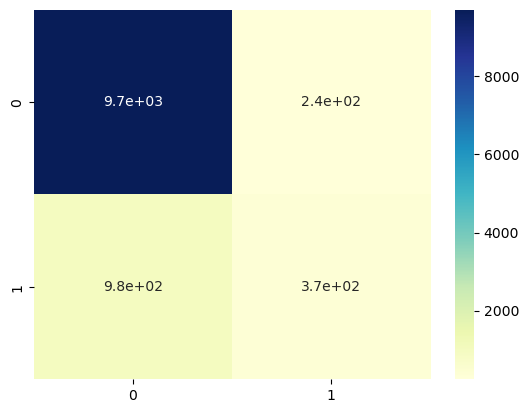

In [93]:
sns.heatmap(cm,annot=True,cmap='YlGnBu')

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[9711  239]
 [ 985  368]]


# Classification Report

In [95]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9950
         yes       0.61      0.27      0.38      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.62      0.66     11303
weighted avg       0.87      0.89      0.87     11303



In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [97]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9760


In [98]:
# print recall score
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9079


In [99]:
# print TPR
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9079


In [100]:
# print FPR
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3937


In [101]:
# print specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6063


In [102]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logit.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.99181327, 0.00818673],
       [0.96374771, 0.03625229],
       [0.7867642 , 0.2132358 ],
       [0.62869947, 0.37130053],
       [0.95928334, 0.04071666],
       [0.93349571, 0.06650429],
       [0.96077922, 0.03922078],
       [0.60411076, 0.39588924],
       [0.97626787, 0.02373213],
       [0.83686702, 0.16313298]])

In [103]:
y_pred_prob = pd.DataFrame(data=y_pred_prob, columns=['Prob of value(0)', 'Prob of value(1)'])
y_pred_prob

,Prob of value(0),Prob of value(1)
0,0.991813,0.008187
1,0.963748,0.036252
2,0.786764,0.213236
3,0.628699,0.371301
4,0.959283,0.040717
5,0.933496,0.066504
6,0.960779,0.039221
7,0.604111,0.395889
8,0.976268,0.023732
9,0.836867,0.163133


In [104]:
y_pred1 = logit.predict_proba(X_test)[:, 1]

In [105]:
y_pred1

array([0.00818673, 0.03625229, 0.2132358 , ..., 0.07377739, 0.0664337 ,
       0.26241897])

Text(0, 0.5, 'Frequency')

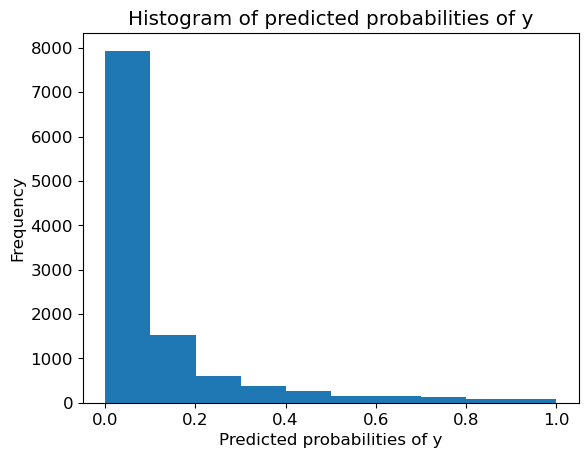

In [106]:
# adjust the font size 
plt.rcParams['font.size'] = 12

plt.hist(y_pred1, bins = 10)

plt.title('Histogram of predicted probabilities of y')

# set the title
plt.xlabel('Predicted probabilities of y')
plt.ylabel('Frequency')

# ROC Curve

0.8929584359342908


Text(0, 0.5, 'True Positive Rate / Sensitivity')

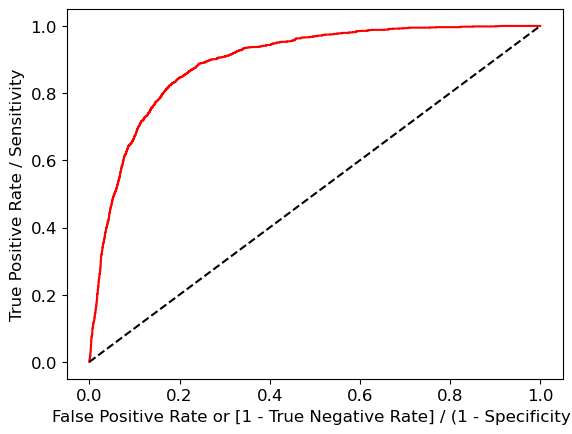

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1],pos_label='yes')

auc = roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
print(auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

In [108]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8930



# k-fold cross validation

In [109]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logit, X_train, y_train, cv = 5, scoring='accuracy')
print(f'Cross-validation scores:{scores.mean()}')

Cross-validation scores:0.8957474679346523


# Hyperparameter Tuning using GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

param=[{'penalty':['l1','l2']},
      {'C':[1,10,100]}]


grid_search=GridSearchCV(estimator=logit,param_grid=param,scoring='accuracy',cv=5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10, random_state=1,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100]}],
             scoring='accuracy')

In [111]:
print(f'GridSearch CV best score:\n{grid_search.best_score_}\n\n')

# print parameters that give the best results
print(f'Parameters that give the best results:\n{grid_search.best_params_}\n\n')

# print estimator that was chosen by the GridSearch
print(f'Estimator that was chosen by the search:\n{grid_search.best_estimator_}\n\n')

GridSearch CV best score:
0.8959539271589556


Parameters that give the best results:
{'penalty': 'l1'}


Estimator that was chosen by the search:
LogisticRegression(C=10, penalty='l1', random_state=1, solver='liblinear')




In [112]:
grid_search.score(X_test,y_test)

0.8917101654428028

In [113]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8917
